In [ ]:
from sklearn.datasets import load_iris

import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                     test_size= 0.25,
                     stratify= y,
                     random_state= 123)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)



Number of samples: 150
Number of features: 4
X_train shape: (112, 4)
X_test shape: (38, 4)


In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)



In [ ]:
#Fitting Decision Tree classifier to the training set
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
#Predicting the test set result
Y_pred= classifier.predict(X_test)


In [ ]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, Y_pred)


<ipython-input-35-9f1c8f453a06>:17: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x= X_train[y_train == cl, 0], y= X_train[y_train == cl, 1],


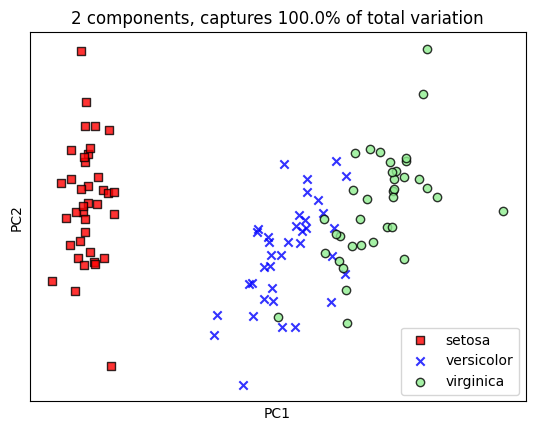

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
x_set, y_set = X_train, Y_train

pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)


# Scatter plot of data
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen')
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x= X_train[y_train == cl, 0], y= X_train[y_train == cl, 1],
                alpha= 0.8, c= colors[idx],
                marker= markers[idx], label= target_names[cl], edgecolor= 'black')
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.legend(loc="lower right")
plt.show()

In [1]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

def run_classifier(clf, param_grid, title):
    # -----------------------------------------------------
    cv = StratifiedKFold(n_splits= 3, shuffle = True, random_state= 123)
    # Randomized grid search
    n_iter_search = 10
    gs = RandomizedSearchCV(clf,param_distributions = param_grid,n_iter = n_iter_search,cv = cv,scoring= 'accuracy')
    # -----------------------------------------------------
    # Train model
    gs.fit(X_train, y_train)
    print("The best parameters are %s" % (gs.best_params_))
    # Predict on test set
    y_pred = gs.best_estimator_.predict(X_test)
    # Get Probability estimates
    y_prob = gs.best_estimator_.predict_proba(X_test)[:, 1]
    # -----------------------------------------------------
    print('Accuracy score: %.2f%%' %(accuracy_score(y_test, y_pred)*100))
    print('Precision score: %.2f%%' % (precision_score(y_test, y_pred, average= 'weighted')*100))
    print('Recall score: %.2f%%' % (recall_score(y_test, y_pred, average= 'weighted')*100))
    # -----------------------------------------------------
    # Plot confusion matrix
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    cm = confusion_matrix(y_test, y_pred)#, labels= target_names)
    sns.heatmap(cm, annot = True, cbar = False, fmt = "d", linewidths = .5, cmap = "Blues", ax = ax1)
    ax1.set_title("Confusion Matrix")
    ax1.set_xlabel("Predicted class")
    ax1.set_ylabel("Actual class")
    ax1.set_xticklabels(target_names)
    ax1.set_yticklabels(target_names)
    fig.tight_layout()
    # -----------------------------------------------------
    # Plot the decision boundary
    cmap = ListedColormap(colors[:len(np.unique(y_test))])
    # plot the decision surface
    x1_min, x1_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    x2_min, x2_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    resolution = 0.01 # step size in the mesh
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = gs.best_estimator_.predict(np.c_[xx1.ravel(), xx2.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    # plot class samples
    for idx, cl in enumerate(np.unique(y_test)):
        plt.scatter(x= X_test[y_test == cl, 0],
                    y= X_test[y_test == cl, 1],
                    alpha= 0.8,
                    c= colors[idx],
                    marker= markers[idx],
                    label= target_names[cl],
                    edgecolor= 'black')
    ax2.set_title(title)
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xticks([]); plt.yticks([])
    plt.legend(loc='lower right')
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1,15),'weights': ['uniform', 'distance'],'leaf_size':[1, 3, 5],'algorithm':['auto', 'kd_tree']}

run_classifier(knn, param_grid, 'Nearest Neighbors')